### 《合成孔径雷达成像——算法与实现》中7.3 CS算法中的距离徙动校正

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

from numpy import pi,abs,max,min,argmax,argmin,ceil,exp,sqrt,real,imag,conj,sinc,sin,cos,tan,arctan,log10,angle,unwrap
from numpy import linspace,arange,zeros,ones,concatenate,convolve
from numpy.fft import fft,fftshift,ifft,ifftshift,fft2
from matplotlib.pyplot import figure,subplot,plot,axis,title,suptitle,xlabel,ylabel,text,arrow,tight_layout

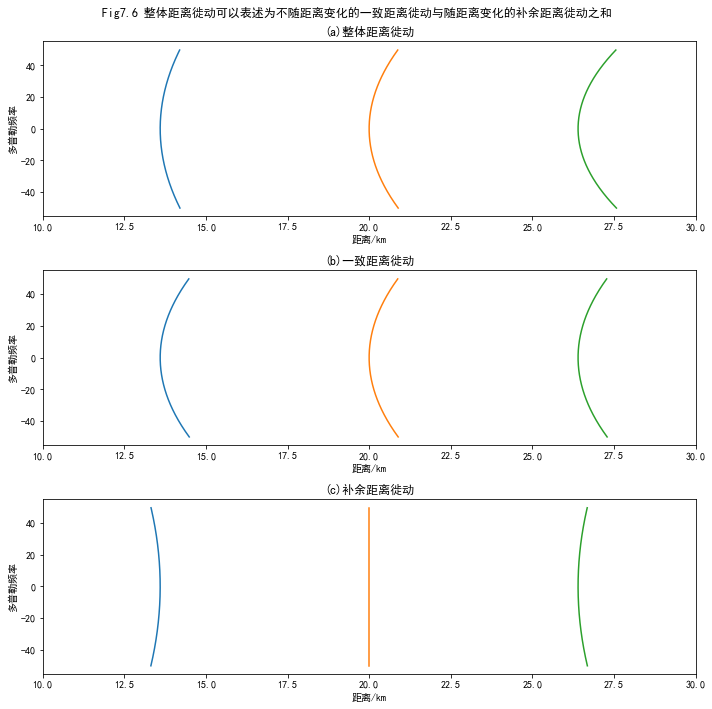

In [3]:
## 参数设置
#  雷达参数
c = 3e8;
Vr = 150;
f0 = 5.3e9;
#  距离参数
R0 = 20e3;
Fr = 60e6;
Naz = 256;
#  方位参数
Fa = 100;
Nrg = 5120;
f_eta_c = 0;
## 参数计算
#  雷达参数
lambda0 = c/f0;
## 变量设置
R_mtx = np.array([R0-Nrg/4/Fr*c, R0, R0+Nrg/4/Fr*c]).reshape(3,1);
f_eta = arange(-Fa/2,Fa/2,Fa/Naz).reshape(1,-1);

## 信号生成
RCM_total = np.matmul(lambda0**2/8/Vr**2*R_mtx,(f_eta**2 - f_eta_c**2));
RCM_bulk  = np.matmul(lambda0**2/8/Vr**2*R0*ones((3,1)),(f_eta**2 - f_eta_c**2));
RCM_diff  = np.matmul(lambda0**2/8/Vr**2*(R_mtx - R0*ones((3,1))),(f_eta**2 - f_eta_c**2));
# print( RCM_total)
## 绘制图形
H4 = figure(figsize=(10,10));
# set(H4,'position',[100,100,600,600]); 
t1 = R_mtx[0,:]/1000 + RCM_total[0,:]

subplot(311),  plot(R_mtx[0,:]/1000 + RCM_total[0,:], f_eta[0], R_mtx[1,:]/1000 + RCM_total[1,:], f_eta[0], R_mtx[2,:]/1000 + RCM_total[2,:], f_eta[0]), axis([10,30, -55,+55]), xlabel('距离/km'), ylabel('多普勒频率'), title('(a)整体距离徙动');
subplot(312), plot(R_mtx[0,:]/1000 + RCM_bulk[0,:], f_eta[0], R_mtx[1,:]/1000 + RCM_bulk[1,:], f_eta[0], R_mtx[2,:]/1000 + RCM_bulk[2,:], f_eta[0]), axis([10,30, -55,+55]), xlabel('距离/km'), ylabel('多普勒频率'), title('(b)一致距离徙动');
subplot(313), plot(R_mtx[0,:]/1000 + RCM_diff[0,:], f_eta[0], R_mtx[1,:]/1000 + RCM_diff[1,:], f_eta[0], R_mtx[2,:]/1000 + RCM_diff[2,:], f_eta[0]), axis([10,30, -55,+55]), xlabel('距离/km'), ylabel('多普勒频率'), title('(c)补余距离徙动');
suptitle('Fig7.6 整体距离徙动可以表述为不随距离变化的一致距离徙动与随距离变化的补余距离徙动之和');

plt.tight_layout()

本文Python代码参照Matlab代码自：https://gitee.com/wanghs008/SAR-SignalProcessing/tree/main/chapter_seven
